In [1]:
import pandas as pd
import numpy as np

In [2]:
# 导入数据‘user_profile.csv’
column1 = ['用户ID', '年龄', '性别', '职业','常居城市','人群标签']
df1 = pd.read_csv(r'D:\PycharmProjects\userprofile\user_profile.csv',names=column1)
df1.head()

,用户ID,年龄,性别,职业,常居城市,人群标签
0,696874,77,3,8,215,11;10;14;16
1,103928,82,3,5,254,10;3;14;16
2,307542,120,3,3,392,19;11;14;4
3,2229054,111,3,13,383,3;13;14;16
4,5538960,124,1,-1,363,19;1;-1;14


In [3]:
# 查看数据的形状
df1.shape

(5655138, 6)

In [4]:
# 导入数据‘item_profile.csv’
column2 = ['商品ID', '商品类目ID', '商品城市', '商品标签']
df2 = pd.read_csv(r'D:\PycharmProjects\userprofile\item_profile.csv',names=column2)
df2.head()

,商品ID,商品类目ID,商品城市,商品标签
0,45214,51,104,-1
1,56843,33,248,-1
2,12469,77,55,-1
3,133265,73,439,-1
4,261582,33,472,-1


In [5]:
# 查看数据的形状
df2.shape

(273188, 4)

In [5]:
# 导入数据‘user_item_behavior_history.csv’
column3 = ['用户ID', '商品ID', '行为类型', '时间戳']
df3 = pd.read_csv(r'D:\PycharmProjects\userprofile\user_item_behavior_history.csv', names=column3)
df3.head()

,用户ID,商品ID,行为类型,时间戳
0,2499531,264562,clk,1559587204
1,2499531,264562,clk,1559587234
2,2499531,264562,clk,1559587325
3,3744925,23419,clk,1559641606
4,3744925,23419,clk,1559641305


In [7]:
# 查看数据的形状
df3.shape

(224542018, 4)

In [6]:
# 将时间戳转换为日期格式
df3['时间戳'] = pd.to_datetime(df3['时间戳'], unit='s')
# 查看前五行数据
df3.head()

,用户ID,商品ID,行为类型,时间戳
0,2499531,264562,clk,2019-06-03 18:40:04
1,2499531,264562,clk,2019-06-03 18:40:34
2,2499531,264562,clk,2019-06-03 18:42:05
3,3744925,23419,clk,2019-06-04 09:46:46
4,3744925,23419,clk,2019-06-04 09:41:45


In [7]:
# 筛选出2021年5月3日至2021年6月4日的数据
start_date = pd.to_datetime('2021-05-03 00:00:00', format='%Y-%m-%d %H:%M:%S') # 开始日期
end_date = pd.to_datetime('2021-06-04 00:00:00', format='%Y-%m-%d %H:%M:%S') # 截止时间
df3 = df3[(df3['时间戳'] >= start_date) & (df3['时间戳'] <= end_date)]
df3 = df3.sort_values(by='时间戳', ascending=True) # 时间按升序排列
df3 = df3.reset_index(drop=True) # 重置索引
df3.head()

,用户ID,商品ID,行为类型,时间戳
0,1653426,26753,clk,2021-05-03
1,4788473,87576,clk,2021-05-03
2,3781318,1858,clk,2021-05-03
3,3961306,241489,clk,2021-05-03
4,4196853,127254,clk,2021-05-03


In [10]:
# 查看该时间段内的数据量
df3.shape

(7983450, 4)

In [8]:
# 查看缺失值
print(df3.isna().sum())

用户ID    0
商品ID    0
行为类型    0
时间戳     0
dtype: int64


In [9]:
# 查看时间是否有异常值
date_max = df3['时间戳'].max()
date_min = df3['时间戳'].min()
print('数据集中的最早日期：', date_min)
print('数据集中的最晚日期：', date_max)

数据集中的最早日期： 2021-05-03 00:00:00
数据集中的最晚日期： 2021-06-03 16:06:15


In [10]:
# 时间格式转换，获取日期、时间、月、日、周几、小时
df3['日期'] = df3['时间戳'].dt.date
df3['月'] = df3['时间戳'].dt.month
df3['日'] = df3['时间戳'].dt.day
df3['星期'] = df3['时间戳'].dt.strftime("%w")
df3['小时'] = df3['时间戳'].dt.hour

In [11]:
# 把列'nehavior_type'中的'clk','fav','cart','pay'替换为1,2,3,4
'''
1——点击
2——收藏
3——加购
4——购买
'''
replace_values = {'clk':1, 'fav':2, 'cart':3, 'pay':4}
df3['行为类型'] = df3['行为类型'].replace(replace_values)

C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\4034640603.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['行为类型'] = df3['行为类型'].replace(replace_values)


In [12]:
df4 = df3.copy()
# 删去时间戳、时间和年列
df4 = df4.drop('时间戳', axis=1)

# 根据用户ID拼接user_profile数据
df4 = pd.merge(df4, df1, how='left', on='用户ID')
# 根据商品ID拼接item_profile数据
df4 = pd.merge(df4, df2, how='left', on='商品ID')
df4.head()

,用户ID,商品ID,行为类型,日期,月,日,星期,小时,年龄,性别,职业,常居城市,人群标签,商品类目ID,商品城市,商品标签
0,1653426,26753,1,2021-05-03,5,3,1,0,61.0,3.0,11.0,224.0,5;20;21;16,13.0,540.0,94
1,4788473,87576,1,2021-05-03,5,3,1,0,18.0,3.0,3.0,509.0,13;14;7;16,13.0,540.0,238
2,3781318,1858,1,2021-05-03,5,3,1,0,46.0,3.0,4.0,253.0,19;17;14;7,13.0,253.0,94;431
3,3961306,241489,1,2021-05-03,5,3,1,0,115.0,3.0,4.0,411.0,19;5;20;21,13.0,411.0,238
4,4196853,127254,1,2021-05-03,5,3,1,0,17.0,3.0,1.0,490.0,19;5;20;21,51.0,472.0,433


In [13]:
# 检查缺失值
print(df4.isna().sum())

用户ID          0
商品ID          0
行为类型          0
日期            0
月             0
日             0
星期            0
小时            0
年龄           45
性别           45
职业           45
常居城市         45
人群标签         45
商品类目ID    10574
商品城市      10574
商品标签      10574
dtype: int64


In [14]:
# 删除缺失值
df4 = df4.dropna()
df4.shape

(7972831, 16)

In [15]:
# 检查年龄是否有异常值
print('年龄的最小值：', df4['年龄'].min())
print('年龄的最大值：', df4['年龄'].max())

年龄的最小值： 1.0
年龄的最大值： 124.0


In [16]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


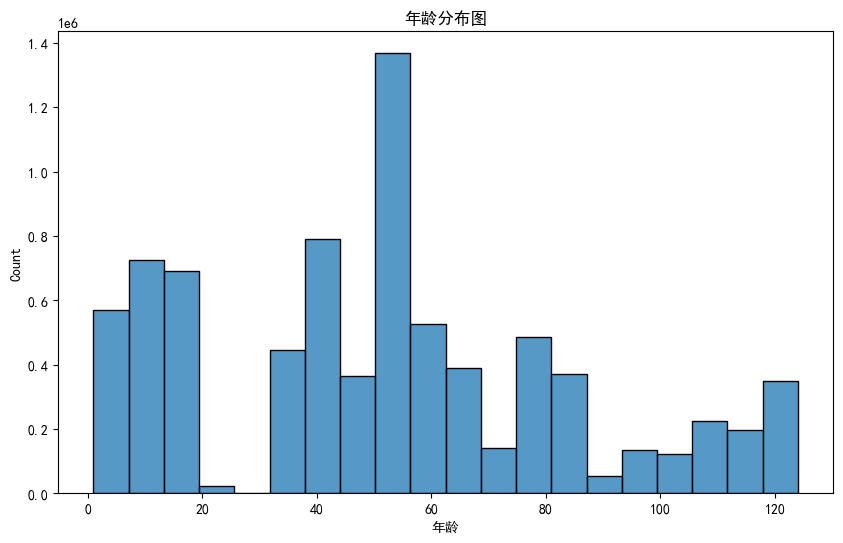

In [17]:
# 画出年龄的分布图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df4['年龄'], bins=20)
plt.title('年龄分布图')
plt.show()


In [18]:
# 只考虑14-65岁的用户
df4 = df4[(df4['年龄'] >= 14) & (df4['年龄'] <= 65)]
df4.shape

(4599163, 16)

In [19]:
uv = df4['用户ID'].nunique() # 用户数量uv
item_num = df4['商品ID'].nunique() # 商品数量
behavior_num = df4['行为类型'].count() # 行为总数
print('用户数量：', uv)
print('商品数量：', item_num)
print('行为总数：', behavior_num)

用户数量： 570701
商品数量： 48745
行为总数： 4599163


In [20]:
clk_num = df4['行为类型'].value_counts()[1] # 点击数量
fav_num = df4['行为类型'].value_counts()[2] # 收藏数量
cart_num = df4['行为类型'].value_counts()[3] # 加购数量
pay_num = df4['行为类型'].value_counts()[4] # 购买数量
print('点击数量：', clk_num)
print('收藏数量：', fav_num)
print('加购数量：', cart_num)
print('购买数量：', pay_num)

点击数量： 4166275
收藏数量： 124818
加购数量： 170360
购买数量： 137710


由以上得到的数据可以知道：点击>加购>购买>收藏，所以转化路径应为：点击-加购-购买。收藏并非购买前的必要路径。

In [21]:
pv_avg = round(clk_num/uv, 2) # 总平均浏览量
fav_avg = round(fav_num/uv, 2) # 总平均收藏量
cart_avg = round(cart_num/uv, 2) # 总平均加购量
pay_avg = round(pay_num/uv, 2) # 总平均购买量
print('总平均浏览量：', pv_avg)
print('总平均收藏量：', fav_avg)
print('总平均加购量：', cart_avg)
print('总平均购买量：', pay_avg)

总平均浏览量： 7.3
总平均收藏量： 0.22
总平均加购量： 0.3
总平均购买量： 0.24


在这一个月内，570701个用户中，每个人平均浏览7.3次，平均收藏量为0.22，平均加购量为0.3，购买转化率为24%，说明用户活跃度不高且购买转化率不高。

In [22]:
fav_data = df4[df4['行为类型'] == 2] # 收藏数据
cart_data = df4[df4['行为类型'] == 3] # 加购数据

In [23]:
clk_data = df4[df4['行为类型'] == 1] # 点击数据
# 日访问量（有重复值，同一用户可以多次查看同一商品）
pv_daily = clk_data.groupby('日期')['用户ID'].count().reset_index().rename(columns={'用户ID': '日访问量'})
# 日访客量（去重）
uv_daily = df4.groupby('日期')['用户ID'].apply(lambda x: x.drop_duplicates().count()).reset_index().rename(columns={'用户ID': '日访客量'})
# 拼接
daily_data = pd.merge(pv_daily, uv_daily, how='outer', on='日期')
# 日平均访问量
daily_data['日平均访问量'] = round(daily_data['日访问量']/daily_data['日访客量'], 2)

In [24]:
daily_data.head()

,日期,日访问量,日访客量,日平均访问量
0,2021-05-03,252136,47592,5.30
1,2021-05-04,203631,40119,5.08
2,2021-05-05,174435,36126,4.83
3,2021-05-06,184223,36370,5.07
4,2021-05-07,168366,34623,4.86


In [25]:
pay_data = df4[df4['行为类型'] == 4]
# 日成交量
pay_daily = pay_data.groupby('日期')['用户ID'].count().reset_index().rename(columns={'用户ID': '日成交量'})
# 拼接
daily_data = pd.merge(daily_data, pay_daily, on='日期')
# 日平均成交量
daily_data['日平均成交量'] = round(daily_data['日成交量']/daily_data['日访客量'], 2)


In [26]:
daily_data.head()

,日期,日访问量,日访客量,日平均访问量,日成交量,日平均成交量
0,2021-05-03,252136,47592,5.30,9749,0.20
1,2021-05-04,203631,40119,5.08,6314,0.16
2,2021-05-05,174435,36126,4.83,4363,0.12
3,2021-05-06,184223,36370,5.07,3342,0.09
4,2021-05-07,168366,34623,4.86,3604,0.10


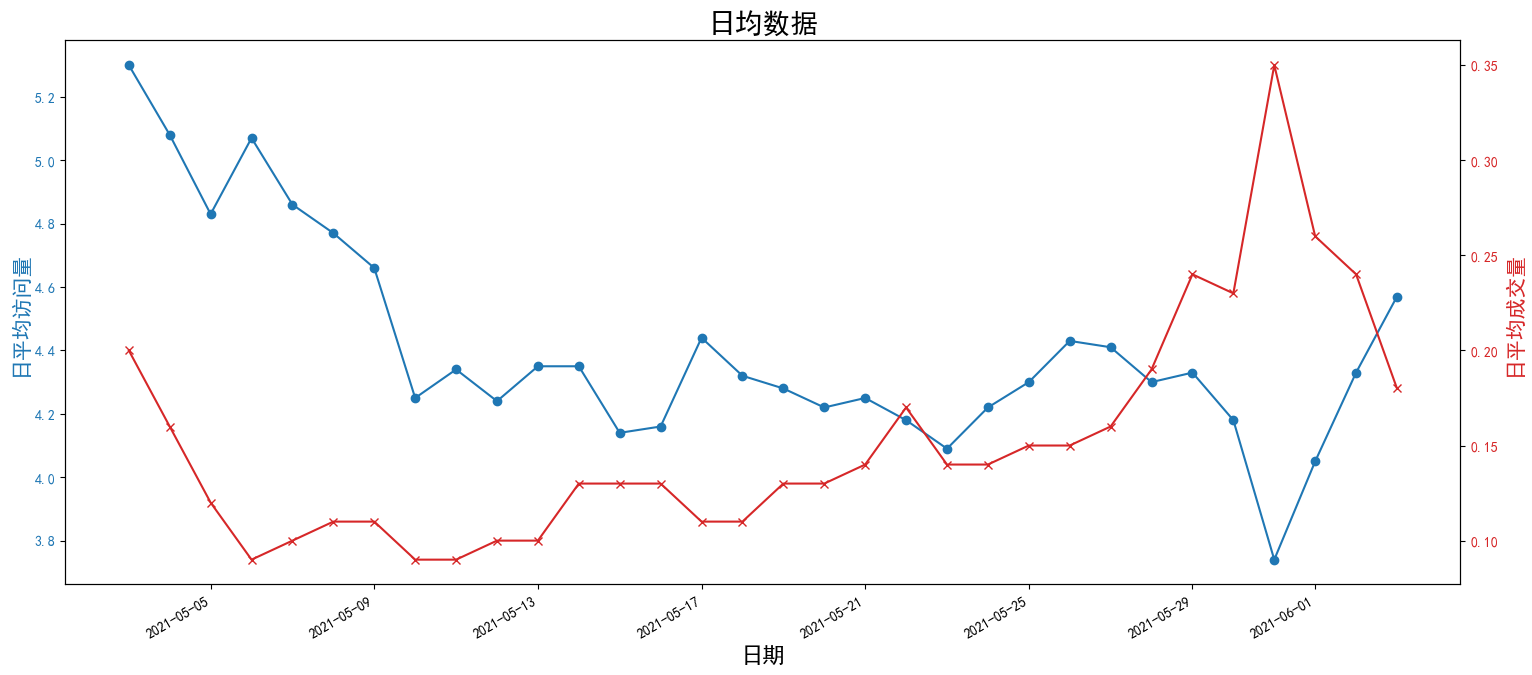

In [27]:
# 创建图形和第一个y轴
fig, ax1 = plt.subplots(figsize=(18, 8))
# 绘制日平均访问量
color = 'tab:blue'
ax1.set_xlabel('日期', fontsize=16)
ax1.set_ylabel('日平均访问量', color=color, fontsize=15)
ax1.plot(daily_data['日期'], daily_data['日平均访问量'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个y轴
ax2 = ax1.twinx()
# 绘制日平均成交量
color = 'tab:red'
ax2.set_ylabel('日平均成交量', color=color, fontsize=15)
ax2.plot(daily_data['日期'], daily_data['日平均成交量'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# 设置标题
plt.title('日均数据', fontsize=20)
# 自动调整日期标签的显示
fig.autofmt_xdate()
# 显示图形
plt.show()


每天的人均访问量从上半月急剧下滑，到下半月持续走低，直至月底31号跌倒谷底，然后又突然上升；  
每天的人均成交量从月初直线下降，然后缓慢回升，直至月底31号达到顶峰，随后突然回落。

In [31]:
# 每小时访问量
pv_hour = clk_data.groupby('小时')['用户ID'].count().reset_index().rename(columns={'用户ID': '每小时访问量'})
# 每小时访客量
uv_hour = df4.groupby('小时')['用户ID'].apply(lambda x: x.drop_duplicates().count()).reset_index().rename(columns={'用户ID': '每小时访客量'})
# 拼接
hour_data = pd.merge(pv_hour, uv_hour, how='outer', on='小时')
# 每小时平均访问量
hour_data['每小时平均访问量'] = round(hour_data['每小时访问量']/hour_data['每小时访客量'], 2)

In [33]:
# 每小时成交量
pay_hour = pay_data.groupby('小时')['用户ID'].count().reset_index().rename(columns={'用户ID': '每小时成交量'})
# 拼接
hour_data = pd.merge(hour_data, pay_hour, on='小时')
# 每小时平均成交量
hour_data['每小时平均成交量'] = round(hour_data['每小时成交量']/hour_data['每小时访客量'], 2)

In [34]:
hour_data.head()

,小时,每小时访问量,每小时访客量,每小时平均访问量,每小时成交量,每小时平均成交量
0,0,177744,49134,3.62,4910,0.10
1,1,232616,61320,3.79,9079,0.15
2,2,264081,67001,3.94,15153,0.23
3,3,257463,63853,4.03,10217,0.16
4,4,245597,61898,3.97,8784,0.14


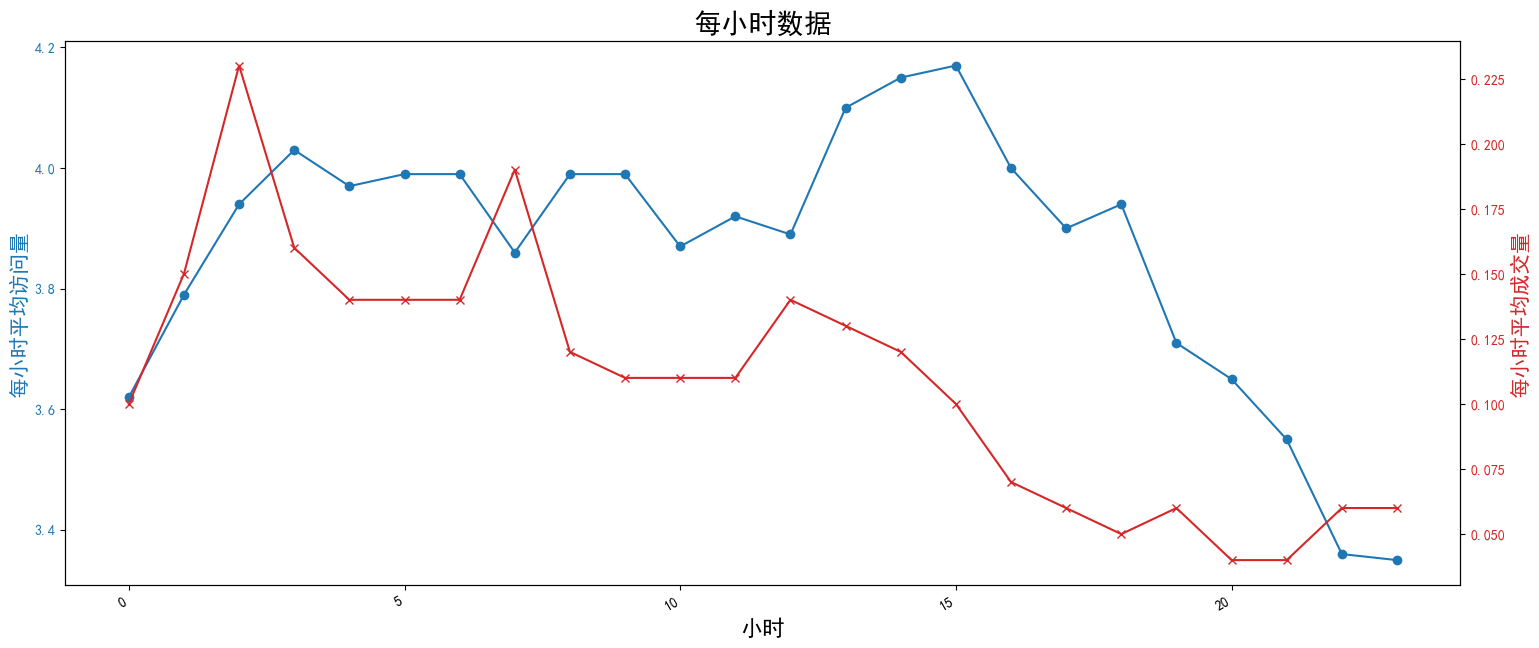

In [35]:
# 创建图形和第一个y轴
fig, ax1 = plt.subplots(figsize=(18, 8))
# 绘制每小时平均访问量
color = 'tab:blue'
ax1.set_xlabel('小时', fontsize=16)
ax1.set_ylabel('每小时平均访问量', color=color, fontsize=15)
ax1.plot(hour_data['小时'], hour_data['每小时平均访问量'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个y轴
ax2 = ax1.twinx()
# 绘制每小时平均成交量
color = 'tab:red'
ax2.set_ylabel('每小时平均成交量', color=color, fontsize=15)
ax2.plot(hour_data['小时'], hour_data['每小时平均成交量'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# 设置标题
plt.title('每小时数据', fontsize=20)
# 自动调整小时标签的显示
fig.autofmt_xdate()
# 显示图形
plt.show()


每时刻的人均访问量从零点开始上升，在凌晨3点之后缓慢回落，在12点之后又开始一直上升，直至下午2点达到顶点，之后急剧下降；  
每时刻的人均成交量从零点开始上升，在凌晨3点达到顶点，之后不断回落，在中午12点之后急剧下滑。

In [36]:
# 每周访问量
pv_weekday = clk_data.groupby('星期')['用户ID'].count().reset_index().rename(columns={'用户ID': '周访问量'})
# 每周访客量
uv_weekday = df4.groupby('星期')['用户ID'].apply(lambda x: x.drop_duplicates().count()).reset_index().rename(columns={'用户ID': '周访客量'})
# 拼接
weekday_data = pd.merge(pv_weekday, uv_weekday, how='outer', on='星期')
# 每周平均访问量
weekday_data['每周几平均访问量'] = round(weekday_data['周访问量']/weekday_data['周访客量'], 2)

In [37]:
# 每周成交量
pay_weekday = pay_data.groupby('星期')['用户ID'].count().reset_index().rename(columns={'用户ID': '周成交量'})
# 拼接
weekday_data = pd.merge(weekday_data, pay_weekday, on='星期')
# 每周平均成交量
weekday_data['每周几平均成交量'] = round(weekday_data['周成交量']/weekday_data['周访客量'], 2)

In [38]:
weekday_data.head()

,星期,周访问量,周访客量,每周几平均访问量,周成交量,每周几平均成交量
0,0,442889,96465,4.59,14878,0.15
1,1,722907,147573,4.90,28518,0.19
2,2,684526,140570,4.87,22164,0.16
3,3,642179,132976,4.83,20285,0.15
4,4,652467,131802,4.95,18260,0.14


In [39]:
# 将星期数字映射为星期名称
weekday_mapping = {
    '0': '星期日',
    '1': '星期一',
    '2': '星期二',
    '3': '星期三',
    '4': '星期四',
    '5': '星期五',
    '6': '星期六'
}
weekday_data['星期映射'] = weekday_data['星期'].map(weekday_mapping)
weekday_data

,星期,周访问量,周访客量,每周几平均访问量,周成交量,每周几平均成交量,星期映射
0,0,442889,96465,4.59,14878,0.15,星期日
1,1,722907,147573,4.90,28518,0.19,星期一
2,2,684526,140570,4.87,22164,0.16,星期二
3,3,642179,132976,4.83,20285,0.15,星期三
4,4,652467,131802,4.95,18260,0.14,星期四
5,5,529214,110572,4.79,16255,0.15,星期五
6,6,492093,105207,4.68,17350,0.16,星期六


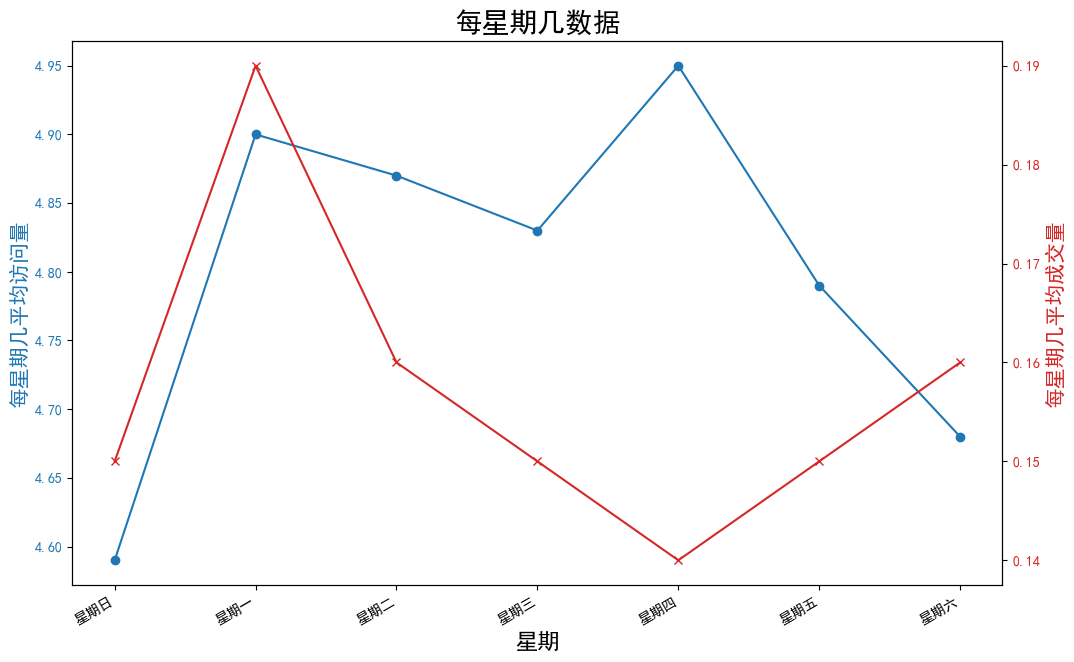

In [40]:
# 创建图形和第一个y轴
fig, ax1 = plt.subplots(figsize=(12, 8))
# 绘制每周平均访问量
color = 'tab:blue'
ax1.set_xlabel('星期', fontsize=16)
ax1.set_ylabel('每星期几平均访问量', color=color, fontsize=15)
ax1.plot(weekday_data['星期映射'], weekday_data['每周几平均访问量'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个y轴
ax2 = ax1.twinx()
# 绘制每周平均成交量
color = 'tab:red'
ax2.set_ylabel('每星期几平均成交量', color=color, fontsize=15)
ax2.plot(weekday_data['星期映射'], weekday_data['每周几平均成交量'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# 设置标题
plt.title('每星期几数据', fontsize=20)
# 自动调整日期标签的显示
fig.autofmt_xdate()
# 显示图形
plt.show()

人均访问量最高是周一，最低是周日；  
人均支付量最高是周一，最低是周四和周五。  
总结  
用户在31日人均成交量和人均访问量分别达到最高和最低；  
用户在凌晨比较活跃，人均成交量高，凌晨两点左右人均成交量最高，下午三点人均访问量最高；  
周一时的人均成交量和人均访问量同时达到最高；  
经查询日历，发现2021年5月31日正好是周一，所以可以猜测应该是由于6月份有‘618’活动，活动力度和优惠力度较大，需要在6月之前下单完成，所以用户在活动结束前5.31集中进行购买之前已经收藏和加购好的商品，很少再进行浏览；  
总体用户的活跃度和支付转化率较低。

In [43]:
from datetime import timedelta
# 创建n日留存函数
def cal_retention(data, n):  # n为n日留存
    user = []
    date = pd.Series(data['日期'].unique()).sort_values()[:-n] # 时间截取至最后一天的前n天
    retention_rates =[]
    for i in date:
        new_user = set(data[data['日期'] == i]['用户ID'].unique()) - set(user) # 识别新用户，设初始用户量为零
        user.extend(new_user)
        # 第n天留存状况
        user_nday = data[data['日期'] == i+timedelta(n)]['用户ID'].unique() # 第n天登陆的用户状况
        a = 0
        for user_id in user_nday:
            if user_id in new_user:
                a += 1
        retention_rate = a/len(new_user) # 计算该天第n日留存率
        retention_rates.append(retention_rate) # 汇总n日留存数据
    data_retention = pd.Series(retention_rates, index=date)
    return data_retention


In [44]:
# 分别计算留存率
retention_2days = cal_retention(df4, 1).apply(lambda x: format(x, '.2%'))   # 次日留存
retention_3days = cal_retention(df4, 2).apply(lambda x: format(x, '.2%'))   # 3日留存
retention_7days = cal_retention(df4, 6).apply(lambda x: format(x, '.2%'))   # 7日留存
retention_15days = cal_retention(df4, 14).apply(lambda x: format(x, '.2%'))   # 15日留存
retention_30days = cal_retention(df4, 29).apply(lambda x: format(x, '.2%'))   # 30日留存
# 留存拼接
retention_data = pd.concat([retention_2days, retention_3days, retention_7days, retention_15days, retention_30days], axis=1)

In [45]:
# 改变列名
retention_data.columns = ['次日留存率', '3日留存率', '7日留存率', '15日留存率', '30日留存率']
retention_data = retention_data.replace(np.nan, '')
retention_data

,次日留存率,3日留存率,7日留存率,15日留存率,30日留存率
2021-05-03,12.01%,7.23%,4.33%,2.93%,1.95%
2021-05-04,9.78%,6.94%,4.11%,2.83%,1.87%
2021-05-05,9.29%,6.49%,4.59%,2.75%,1.53%
2021-05-06,9.74%,7.06%,4.96%,3.15%,
2021-05-07,9.16%,5.72%,4.70%,2.77%,
2021-05-08,7.87%,6.35%,3.84%,2.22%,
2021-05-09,7.69%,5.67%,4.05%,2.54%,
2021-05-10,8.72%,5.89%,3.10%,2.89%,
2021-05-11,7.93%,5.83%,3.55%,2.40%,
2021-05-12,7.94%,5.34%,3.56%,2.43%,


In [46]:
# 计算平均次留存率
avg_retention_2days = retention_2days.apply(lambda x: float(x.strip('%'))).mean()
avg_retention_3days = retention_3days.apply(lambda x: float(x.strip('%'))).mean()
avg_retention_7days = retention_7days.apply(lambda x: float(x.strip('%'))).mean()
avg_retention_15days = retention_15days.apply(lambda x: float(x.strip('%'))).mean()
avg_retention_30days = retention_30days.apply(lambda x: float(x.strip('%'))).mean()
print(f'平均次留存率: {avg_retention_2days:.2f}%')
print(f'平均3日留存率: {avg_retention_3days:.2f}%')
print(f'平均7日留存率: {avg_retention_7days:.2f}%')
print(f'平均15日留存率: {avg_retention_15days:.2f}%')
print(f'平均30日留存率: {avg_retention_30days:.2f}%')


平均次留存率: 8.05%
平均3日留存率: 5.41%
平均7日留存率: 3.52%
平均15日留存率: 2.40%
平均30日留存率: 1.78%


从不同的时间来看，留存率整体是比较低的，但这也可能跟多数用户出行频率不高的原因有关；  
从另一个方面，可以加大活动优惠，提升产品品质，增强用户粘度。

In [28]:
df4.head()

,用户ID,商品ID,行为类型,日期,月,日,星期,小时,年龄,性别,职业,常居城市,人群标签,商品类目ID,商品城市,商品标签
0,1653426,26753,1,2021-05-03,5,3,1,0,61.0,3.0,11.0,224.0,5;20;21;16,13.0,540.0,94
1,4788473,87576,1,2021-05-03,5,3,1,0,18.0,3.0,3.0,509.0,13;14;7;16,13.0,540.0,238
2,3781318,1858,1,2021-05-03,5,3,1,0,46.0,3.0,4.0,253.0,19;17;14;7,13.0,253.0,94;431
4,4196853,127254,1,2021-05-03,5,3,1,0,17.0,3.0,1.0,490.0,19;5;20;21,51.0,472.0,433
6,8705,208818,1,2021-05-03,5,3,1,0,55.0,3.0,3.0,354.0,19;5;20;17,51.0,341.0,-1


In [48]:
# 提取唯一用户，基于用户ID去重
df5 = df4.drop_duplicates(subset=["用户ID"])[["用户ID", "年龄", "性别", "职业", "常居城市", "人群标签"]]

# 拆分人群标签为多个二分类属性
# 首先按分号分割人群标签
tags_split = df5["人群标签"].str.split(";", expand=True)

# 获取所有可能的人群标签
unique_tags = pd.Series(tags_split.values.ravel()).dropna().unique()

# 创建二分类属性列
for tag in unique_tags:
    df5[f"标签_{tag}"] = df5["人群标签"].apply(lambda x: 1 if str(tag) in str(x).split(";") else 0)

# 移除原始人群标签列
df5 = df5.drop(columns=["人群标签"])

# 查看结果
df5.head()


,用户ID,年龄,性别,职业,常居城市,标签_5,标签_20,标签_21,标签_16,标签_13,...,标签_8,标签_15,标签_12,标签_2,标签_11,标签_10,标签_9,标签_6,标签_18,标签_-1
0,1653426,61.0,3.0,11.0,224.0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4788473,18.0,3.0,3.0,509.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3781318,46.0,3.0,4.0,253.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4196853,17.0,3.0,1.0,490.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8705,55.0,3.0,3.0,354.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


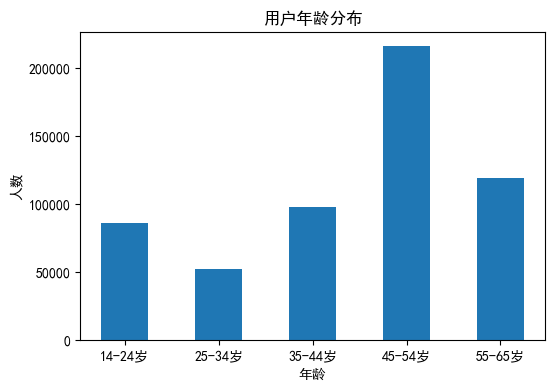

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 年龄分布
bins = [14, 25, 35, 45, 55, 65]
labels = ['14-24岁', '25-34岁', '35-44岁', '45-54岁', '55-65岁']
plt.figure(figsize=(6, 4))
plt.bar(labels, df5['年龄'].value_counts(bins=bins, sort=False), width=0.5)
plt.title("用户年龄分布")
plt.xlabel("年龄")
plt.ylabel("人数")
plt.show()

用户的年龄主要集中在45~60岁年龄段，这个年龄的用户在退休年龄左右，相对年轻人和中年人来说，没有太大经济和生活压力，更懂得也有时间享受生活出去旅行。

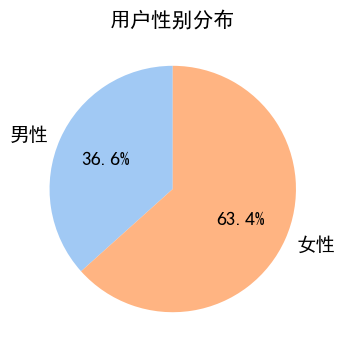

In [51]:
# 性别分布：绘制饼图
gender_distribution = df5["性别"].value_counts()

# 为性别编码设置标签
labels = ["男性", "女性"]
sizes = [gender_distribution.get(2.0, 0), gender_distribution.get(3.0, 0)]  # 获取男性和女性的数量

plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # 显示百分比
    startangle=90,  # 起始角度
    colors=sns.color_palette("pastel"),  # 设置柔和颜色
    textprops={'fontsize': 14}  # 设置字体大小
)
plt.title("用户性别分布", fontsize=15)
plt.show()


C:\Users\zwf\AppData\Local\Temp\ipykernel_29948\2826184962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="职业", data=df5, order=df5["职业"].value_counts().index, palette="Blues_r")


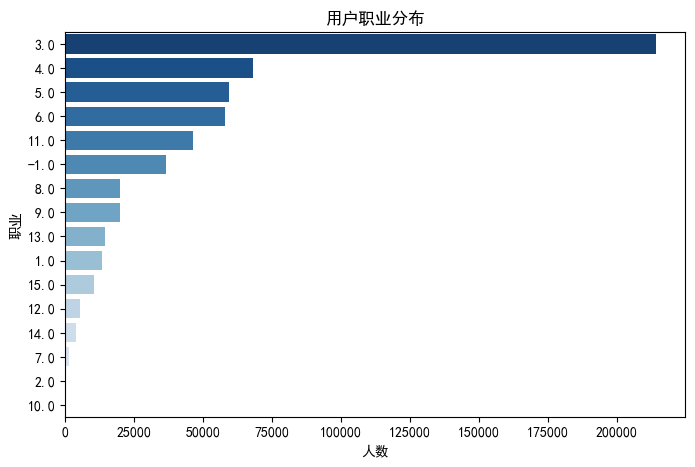

In [52]:
# 职业分布
plt.figure(figsize=(8, 5))
sns.countplot(y="职业", data=df5, order=df5["职业"].value_counts().index, palette="Blues_r")
plt.title("用户职业分布")
plt.xlabel("人数")
plt.ylabel("职业")
plt.show()


C:\Users\zwf\AppData\Local\Temp\ipykernel_29948\3908906422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_r")


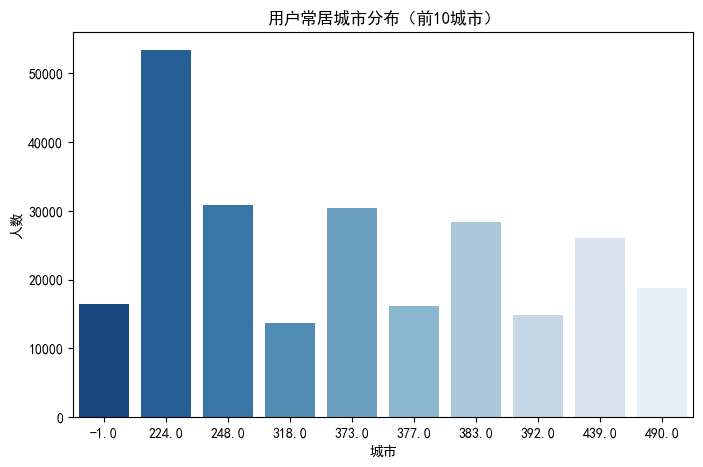

In [53]:
# 常居城市分布
top_cities = df5["常居城市"].value_counts().head(10)  # 显示前10大城市
top_cities = top_cities.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_r")
plt.title("用户常居城市分布（前10城市）")
plt.xlabel("城市")
plt.ylabel("人数")
plt.show()

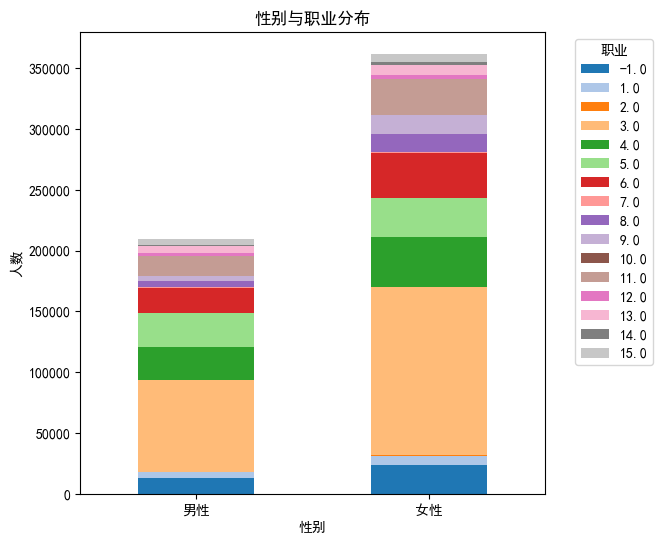

In [54]:
# 性别与职业之间的关系
gender_job_distribution = df5.groupby(["性别", "职业"]).size().unstack(fill_value=0)  # 按性别和职业分组统计

# 绘制堆叠柱状图
gender_labels = ["男性", "女性"]
gender_job_distribution.index = [gender_labels[int(idx) - 2] for idx in gender_job_distribution.index]  # 替换性别编码为中文
# 动态生成调色板，颜色数量与职业数量一致
color_palette = sns.color_palette("tab20", n_colors=len(gender_job_distribution.columns))

gender_job_distribution.plot(kind="bar", stacked=True, figsize=(6, 6), color=color_palette)
plt.title("性别与职业分布")
plt.xlabel("性别")
plt.ylabel("人数")
plt.xticks(rotation=0)
plt.legend(title="职业", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


C:\Users\zwf\AppData\Local\Temp\ipykernel_29948\1200689490.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_tag_distribution = df5.groupby("年龄段")[tag_columns].mean()


<Figure size 1200x600 with 0 Axes>

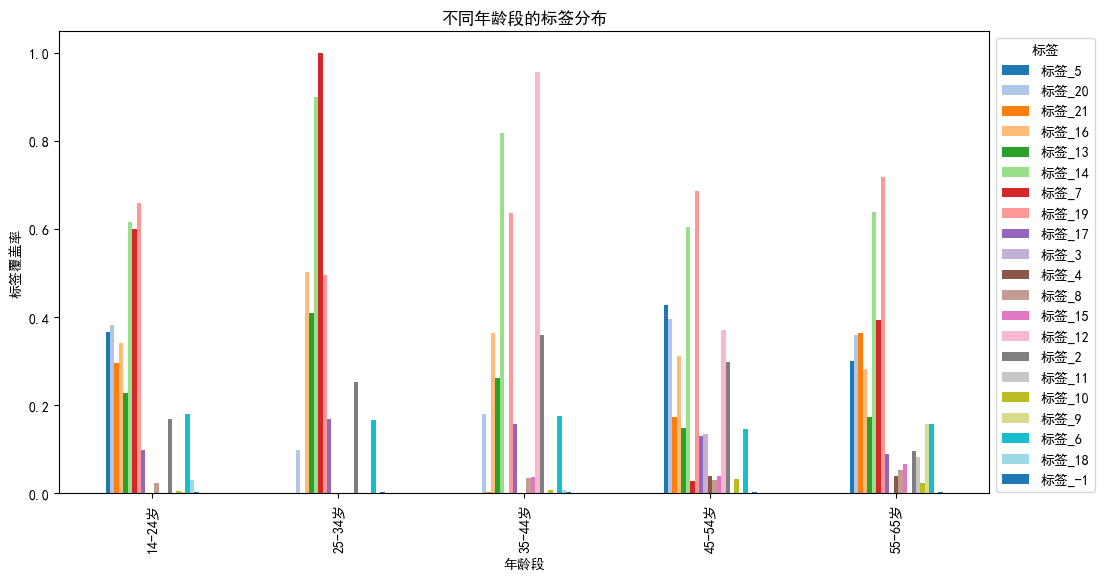

In [55]:
# 添加年龄段分类
df5["年龄段"] = pd.cut(df5["年龄"], bins=[14, 25, 35, 45, 55, 65], labels=["14-24岁", "25-34岁", "35-44岁", "45-54岁", "55-65岁"])

# 计算每个年龄段的标签覆盖率（按平均值计算）
tag_columns = [col for col in df5.columns if col.startswith("标签_")]
age_tag_distribution = df5.groupby("年龄段")[tag_columns].mean()

# 动态生成颜色调色板
color_palette = sns.color_palette("tab20", n_colors=len(tag_columns))

# 绘制柱状图，确保每个标签颜色不同
plt.figure(figsize=(12, 6))
age_tag_distribution.plot(kind="bar", figsize=(12, 6), color=color_palette)

plt.title("不同年龄段的标签分布")
plt.xlabel("年龄段")
plt.ylabel("标签覆盖率")
plt.legend(title="标签", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [57]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules

### 人群标签处理 ###
# 按分号拆分人群标签
population_tags_split = df4["人群标签"].str.split(";", expand=True)

# 统计每个标签出现的次数
population_unique_tags = pd.Series(population_tags_split.values.ravel()).dropna()
population_tag_counts = population_unique_tags.value_counts()

# 筛选高频人群标签（出现次数 >= 阈值）
population_threshold = 500000  # 可根据数据调整
high_freq_population_tags = population_tag_counts[population_tag_counts >= population_threshold].index

# 创建高频人群标签的二分类属性
population_binary_df = pd.DataFrame()
for tag in high_freq_population_tags:
    population_binary_df[f"人群标签_{tag}"] = df4["人群标签"].apply(lambda x: 1 if str(tag) in str(x).split(";") else 0)

In [58]:
### 商品标签处理 ###
# 按分号拆分商品标签
product_tags_split = df4["商品标签"].str.split(";", expand=True)

# 统计每个标签出现的次数
product_unique_tags = pd.Series(product_tags_split.values.ravel()).dropna()
product_tag_counts = product_unique_tags.value_counts()

# 筛选高频商品标签（出现次数 >= 阈值）
product_threshold = 50000  # 可根据数据调整
high_freq_product_tags = product_tag_counts[product_tag_counts >= product_threshold].index

# 创建高频商品标签的二分类属性
product_binary_df = pd.DataFrame()
for tag in high_freq_product_tags:
    product_binary_df[f"商品标签_{tag}"] = df4["商品标签"].apply(lambda x: 1 if str(tag) in str(x).split(";") else 0)

In [59]:
### 拼接结果 ###
# 拼接高频人群标签和商品标签
df4 = pd.concat([df4.reset_index(drop=True), population_binary_df.reset_index(drop=True), product_binary_df.reset_index(drop=True)], axis=1)

# 删除原始标签列
df4 = df4.drop(columns=["人群标签", "商品标签"])

In [60]:
df4.shape

(4599163, 36)

In [61]:
from mlxtend.frequent_patterns import apriori, association_rules

# 筛选二分类属性列用于关联规则挖掘
binary_columns = [col for col in df4.columns if col.startswith("人群标签_") or col.startswith("商品标签_")]
binary_data = df4[binary_columns]

# 将二分类数据（0 和 1）转换为布尔类型
binary_data = binary_data.astype(bool)

# 计算频繁项集
frequent_itemsets = apriori(binary_data, min_support=0.05, use_colnames=True)

In [62]:
# 检查频繁项集结果
print(frequent_itemsets.head())

    support   itemsets
0  0.698271  (人群标签_14)
1  0.642192  (人群标签_19)
2  0.357808  (人群标签_16)
3  0.311468  (人群标签_12)
4  0.300489  (人群标签_20)


In [63]:
# 提供 num_itemsets 参数
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)

# 按提升度排序规则
rules = rules.sort_values(by="lift", ascending=False)

# 在 Jupyter Notebook 中展示前 10 条规则
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
233,(商品标签_169),"(商品标签_94, 人群标签_19)",0.092587,0.093127,0.051541,0.556672,5.977551,1.0,0.042918,2.045604,0.917672,0.384135,0.511147,0.555059
230,"(商品标签_94, 人群标签_19)",(商品标签_169),0.093127,0.092587,0.051541,0.553446,5.977551,1.0,0.042918,2.032035,0.918218,0.384135,0.507883,0.555059
64,(商品标签_94),(商品标签_169),0.166846,0.092587,0.091716,0.549705,5.937145,1.0,0.076268,2.015153,0.998097,0.546849,0.503760,0.770147
65,(商品标签_169),(商品标签_94),0.092587,0.166846,0.091716,0.990588,5.937145,1.0,0.076268,88.517438,0.916418,0.546849,0.988703,0.770147
168,(商品标签_94),"(人群标签_14, 商品标签_169)",0.166846,0.064430,0.063822,0.382522,5.936986,1.0,0.053072,1.515148,0.998092,0.381133,0.339998,0.686542


In [64]:
# 导出关联规则到 Excel 文件
rules.to_excel("关联规则挖掘结果.xlsx", index=False, engine='openpyxl')

c:\Users\zwf\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\zwf\anaconda3\Lib\site-packages\openpyxl\writer\excel.py:292: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  workbook.properties.modified = datetime.datetime.utcnow()


In [66]:
# 筛选提升度大于 1.5 的强规则
strong_rules = rules[rules['lift'] > 1.5]
strong_rules = strong_rules.sort_values(by="lift", ascending=False)

strong_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
233,(商品标签_169),"(商品标签_94, 人群标签_19)",0.092587,0.093127,0.051541,0.556672,5.977551,1.0,0.042918,2.045604,0.917672,0.384135,0.511147,0.555059
230,"(商品标签_94, 人群标签_19)",(商品标签_169),0.093127,0.092587,0.051541,0.553446,5.977551,1.0,0.042918,2.032035,0.918218,0.384135,0.507883,0.555059
64,(商品标签_94),(商品标签_169),0.166846,0.092587,0.091716,0.549705,5.937145,1.0,0.076268,2.015153,0.998097,0.546849,0.503760,0.770147
65,(商品标签_169),(商品标签_94),0.092587,0.166846,0.091716,0.990588,5.937145,1.0,0.076268,88.517438,0.916418,0.546849,0.988703,0.770147
168,(商品标签_94),"(人群标签_14, 商品标签_169)",0.166846,0.064430,0.063822,0.382522,5.936986,1.0,0.053072,1.515148,0.998092,0.381133,0.339998,0.686542


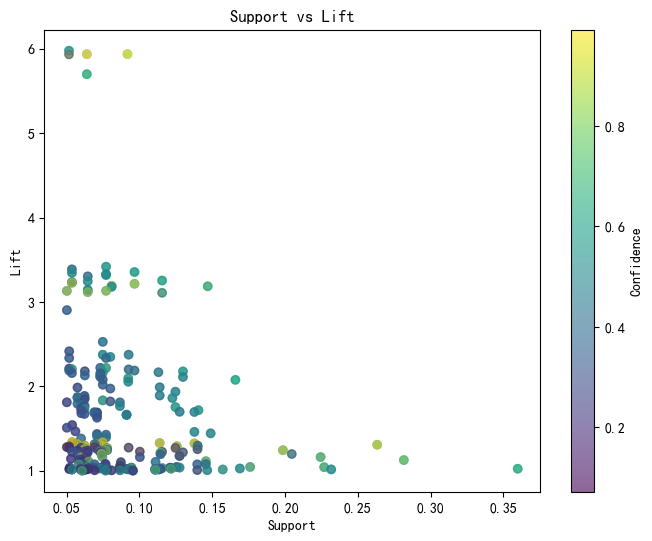

In [67]:
import matplotlib.pyplot as plt

# 散点图：支持度 vs 提升度
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.6, c=rules['confidence'], cmap='viridis')
plt.colorbar(label='Confidence')
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()

In [68]:
# 示例：为特定人群标签推荐商品
target_label = {'人群标签_5'}  # 替换为你的目标前件
recommendations = rules[rules['antecedents'] == target_label]['consequents']

print("根据人群标签推荐的商品:", recommendations.values)

根据人群标签推荐的商品: [frozenset({'商品标签_-1', '人群标签_20', '人群标签_21'})
 frozenset({'人群标签_20', '人群标签_21'}) frozenset({'商品标签_-1', '人群标签_21'})
 frozenset({'人群标签_21'}) frozenset({'人群标签_20', '人群标签_21', '人群标签_19'})
 frozenset({'人群标签_14', '人群标签_21'})
 frozenset({'商品标签_-1', '人群标签_21', '人群标签_19'})
 frozenset({'人群标签_21', '人群标签_19'}) frozenset({'人群标签_20', '人群标签_19'})
 frozenset({'商品标签_-1', '人群标签_20', '人群标签_19'}) frozenset({'人群标签_20'})
 frozenset({'商品标签_-1', '人群标签_20'}) frozenset({'人群标签_19'})
 frozenset({'商品标签_-1', '人群标签_19'}) frozenset({'人群标签_6'})
 frozenset({'商品标签_-1'})]


In [29]:
# 统计每个用户支付次数
pay_times = pay_data[['用户ID', '行为类型']].groupby('用户ID').agg('count').reset_index().rename(columns={'行为类型': '付款次数'})
print(pay_times.head())

   用户ID  付款次数
0    32     6
1   105     1
2   257     4
3   323     1
4   441     1


In [30]:
pay_data.head()

,用户ID,商品ID,行为类型,日期,月,日,星期,小时,年龄,性别,职业,常居城市,人群标签,商品类目ID,商品城市,商品标签
46,1075580,199521,4,2021-05-03,5,3,1,0,63.0,3.0,3.0,318.0,13;14;7;16,13.0,76.0,-1
272,4291942,20600,4,2021-05-03,5,3,1,0,33.0,3.0,3.0,378.0,19;13;14;7,13.0,383.0,-1
327,1098409,162019,4,2021-05-03,5,3,1,0,46.0,3.0,3.0,472.0,4;14;7;16,13.0,104.0,34
384,3638683,259837,4,2021-05-03,5,3,1,0,39.0,3.0,3.0,255.0,13;12;14;16,13.0,373.0,-1
484,475824,271664,4,2021-05-03,5,3,1,0,33.0,3.0,4.0,540.0,19;13;14;7,13.0,540.0,-1


In [31]:
pay_data = pay_data.merge(pay_times, on='用户ID', how='left')
pay_data = pay_data.drop('行为类型', axis=1)
pay_data = pay_data.drop('商品标签', axis=1)
pay_data = pay_data.drop('人群标签', axis=1)
pay_data.shape

(137710, 14)

In [32]:
pay_data = pay_data.drop_duplicates()
pay_data

,用户ID,商品ID,日期,月,日,星期,小时,年龄,性别,职业,常居城市,商品类目ID,商品城市,付款次数
0,1075580,199521,2021-05-03,5,3,1,0,63.0,3.0,3.0,318.0,13.0,76.0,1
1,4291942,20600,2021-05-03,5,3,1,0,33.0,3.0,3.0,378.0,13.0,383.0,2
2,1098409,162019,2021-05-03,5,3,1,0,46.0,3.0,3.0,472.0,13.0,104.0,2
3,3638683,259837,2021-05-03,5,3,1,0,39.0,3.0,3.0,255.0,13.0,373.0,2
4,475824,271664,2021-05-03,5,3,1,0,33.0,3.0,4.0,540.0,13.0,540.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137702,2081773,2553,2021-06-03,6,3,4,15,33.0,3.0,3.0,-1.0,51.0,528.0,3
137704,4687398,194236,2021-06-03,6,3,4,15,18.0,3.0,-1.0,248.0,51.0,490.0,3
137705,2081773,2553,2021-06-03,6,3,4,16,33.0,3.0,3.0,-1.0,51.0,528.0,3
137706,577178,91449,2021-06-03,6,3,4,16,53.0,3.0,-1.0,555.0,13.0,224.0,4


In [33]:
# 重置索引
pay_data = pay_data.reset_index(drop=True)
pay_data.head()

,用户ID,商品ID,日期,月,日,星期,小时,年龄,性别,职业,常居城市,商品类目ID,商品城市,付款次数
0,1075580,199521,2021-05-03,5,3,1,0,63.0,3.0,3.0,318.0,13.0,76.0,1
1,4291942,20600,2021-05-03,5,3,1,0,33.0,3.0,3.0,378.0,13.0,383.0,2
2,1098409,162019,2021-05-03,5,3,1,0,46.0,3.0,3.0,472.0,13.0,104.0,2
3,3638683,259837,2021-05-03,5,3,1,0,39.0,3.0,3.0,255.0,13.0,373.0,2
4,475824,271664,2021-05-03,5,3,1,0,33.0,3.0,4.0,540.0,13.0,540.0,3


In [48]:
# 保存数据
pay_data.to_excel('pay_data.xlsx', index=False, engine='openpyxl')

In [34]:
# 性别分布
gender_distribution = pay_data['性别'].value_counts()

# 年龄段分布
pay_data['年龄段'] = pd.cut(pay_data['年龄'], bins=[14, 25, 35, 45, 55, 65], labels=['14-24', '25-34', '35-44', '45-55', '55-65'])
age_distribution = pay_data['年龄段'].value_counts()

# 职业分布
job_distribution = pay_data['职业'].value_counts()

# 常居城市分布
city_distribution = pay_data['常居城市'].value_counts()


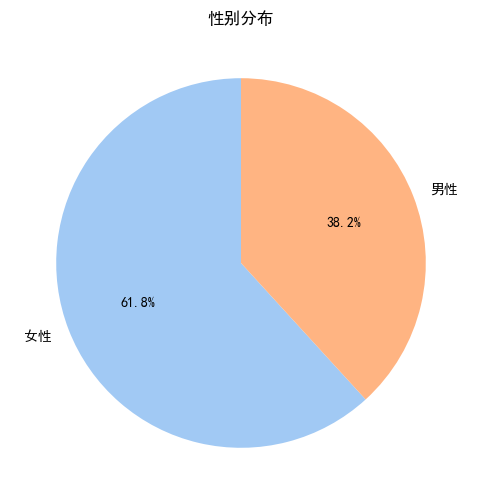

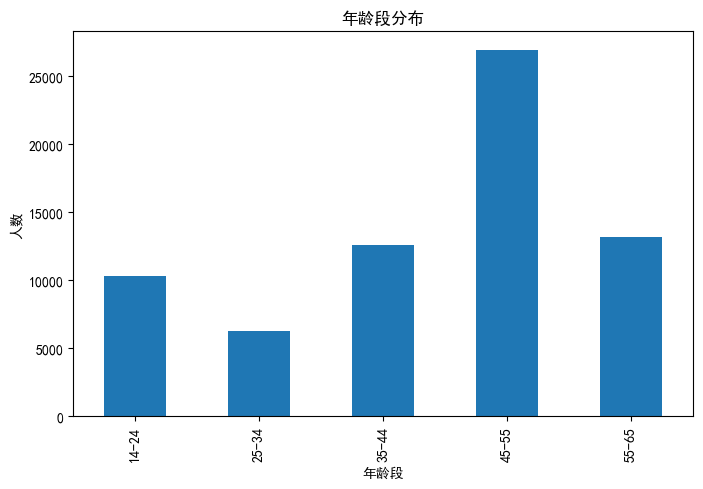

C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\3795786280.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_distribution.index, y=job_distribution.values, palette='Blues_r')


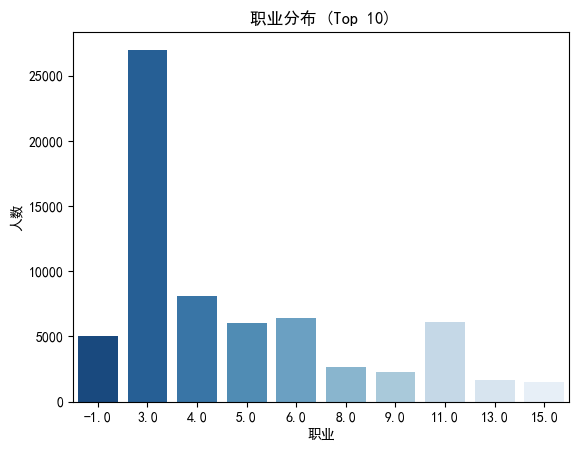

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 性别分布可视化
# 替换性别代码为文字标签
pay_data['性别'] = pay_data['性别'].replace({2.0: '男性', 3.0: '女性'})

# 性别分布可视化
gender_distribution = pay_data['性别'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', 
                         startangle=90, figsize=(6, 6), 
                         title='性别分布', labels=gender_distribution.index, 
                         colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.show()

# 年龄段分布可视化
age_distribution = pay_data['年龄段'].value_counts().sort_index()
age_distribution.plot(kind='bar', figsize=(8, 5), title='年龄段分布')
plt.xlabel('年龄段')
plt.ylabel('人数')
plt.show()

# 职业分布可视化
job_distribution = pay_data['职业'].value_counts().head(10)
sns.barplot(x=job_distribution.index, y=job_distribution.values, palette='Blues_r')
plt.title('职业分布 (Top 10)')
plt.xlabel('职业')
plt.ylabel('人数')
plt.show()


In [37]:
# 用户总购买次数
user_behavior = pay_data.groupby('用户ID')['付款次数'].sum().sort_values(ascending=False)

# 用户活跃度分级
pay_data['活跃度'] = pd.cut(user_behavior, bins=[0, 5, 15, 30, float('inf')], labels=['低活跃', '中活跃', '高活跃', '超级活跃'])
active_distribution = pay_data['活跃度'].value_counts()


C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\1269193800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='coolwarm', width=0.6)


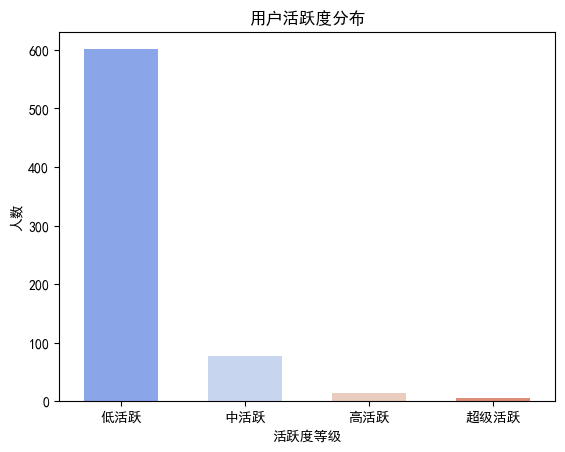

In [38]:
# 活跃度分布可视化
active_distribution = pay_data['活跃度'].value_counts().sort_index()
sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='coolwarm', width=0.6)
plt.title('用户活跃度分布')
plt.xlabel('活跃度等级')
plt.ylabel('人数')
plt.show()

In [40]:
# 商品类目偏好
category_preference = pay_data.groupby('商品类目ID')['付款次数'].sum().sort_values(ascending=False)

# 商品ID偏好
item_preference = pay_data.groupby('商品ID')['付款次数'].sum().sort_values(ascending=False)


C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\2373326672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_preference.index, y=category_preference.values, palette='Blues_d')


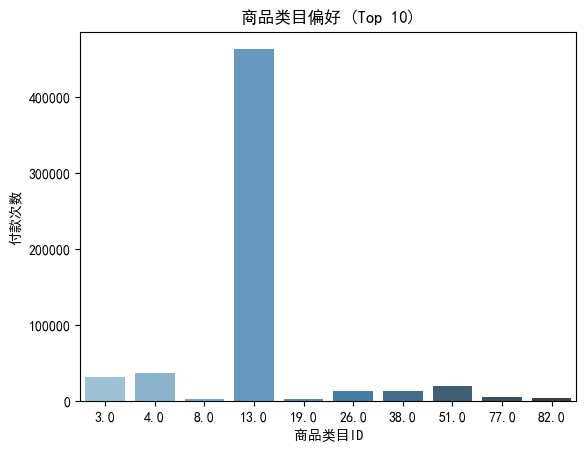

C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\2373326672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_preference.index, y=item_preference.values, palette='Greens_d')


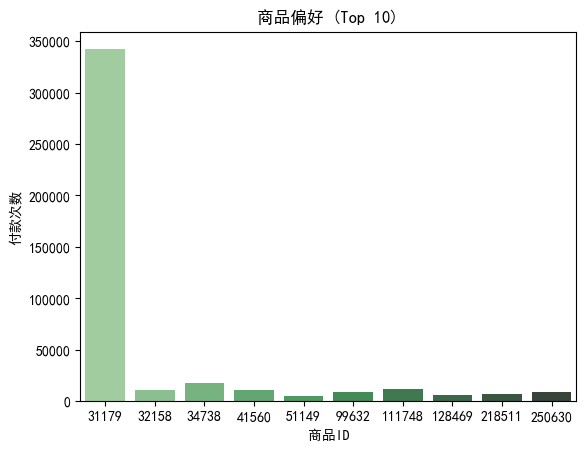

In [41]:
# 商品类目偏好可视化
category_preference = pay_data.groupby('商品类目ID')['付款次数'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_preference.index, y=category_preference.values, palette='Blues_d')
plt.title('商品类目偏好 (Top 10)')
plt.xlabel('商品类目ID')
plt.ylabel('付款次数')
plt.show()

# 商品偏好可视化
item_preference = pay_data.groupby('商品ID')['付款次数'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=item_preference.index, y=item_preference.values, palette='Greens_d')
plt.title('商品偏好 (Top 10)')
plt.xlabel('商品ID')
plt.ylabel('付款次数')
plt.show()


In [42]:
# 用户常居城市偏好
user_city_preference = pay_data.groupby('常居城市')['付款次数'].sum().sort_values(ascending=False).head(10)

# 商品城市偏好
item_city_preference = pay_data.groupby('商品城市')['付款次数'].sum().sort_values(ascending=False).head(10)


C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\1808616855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_city_preference.index, y=user_city_preference.values, palette='Purples_d')


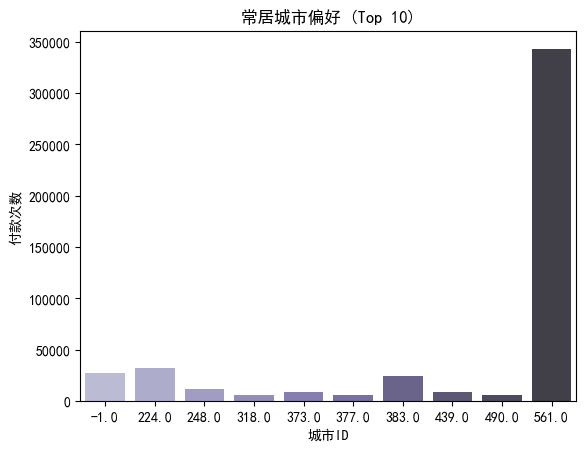

C:\Users\zwf\AppData\Local\Temp\ipykernel_37516\1808616855.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_city_preference.index, y=item_city_preference.values, palette='Oranges_d')


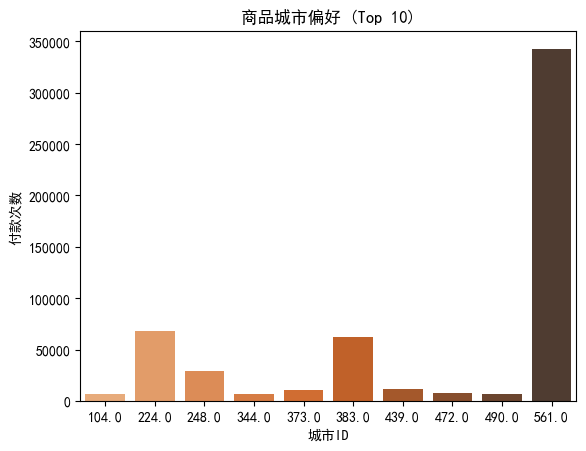

In [43]:
# 用户常居城市偏好可视化
user_city_preference = pay_data.groupby('常居城市')['付款次数'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=user_city_preference.index, y=user_city_preference.values, palette='Purples_d')
plt.title('常居城市偏好 (Top 10)')
plt.xlabel('城市ID')
plt.ylabel('付款次数')
plt.show()

# 商品城市偏好可视化
item_city_preference = pay_data.groupby('商品城市')['付款次数'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=item_city_preference.index, y=item_city_preference.values, palette='Oranges_d')
plt.title('商品城市偏好 (Top 10)')
plt.xlabel('城市ID')
plt.ylabel('付款次数')
plt.show()


In [45]:
# 按常居城市和商品城市统计付款次数
location_data = pay_data.groupby(['常居城市', '商品城市'])['付款次数'].sum().reset_index()
# 透视表形式展示常居城市到商品城市的付款次数
pivot_table = location_data.pivot(index='常居城市', columns='商品城市', values='付款次数').fillna(0)

In [51]:
# 筛选付款记录大于1500的常居城市
filtered_location_data = location_data[location_data['付款次数'] > 1500]
# 创建一个透视表，仅保留筛选后的数据
filtered_pivot_table = filtered_location_data.pivot(index='常居城市', columns='商品城市', values='付款次数').fillna(0)
# 确认筛选后的透视表
filtered_pivot_table

商品城市,224.0,248.0,344.0,373.0,383.0,439.0,561.0
常居城市,,,,,,,
-1.0,22711.0,0.0,0.0,0.0,0.0,0.0,0.0
47.0,0.0,0.0,0.0,0.0,0.0,4806.0,0.0
224.0,14278.0,3187.0,1744.0,0.0,5087.0,1562.0,0.0
248.0,2090.0,3518.0,0.0,0.0,2095.0,0.0,0.0
373.0,0.0,0.0,0.0,1794.0,1698.0,0.0,0.0
383.0,1650.0,1627.0,0.0,0.0,16951.0,0.0,0.0
525.0,0.0,0.0,1621.0,0.0,0.0,0.0,0.0
554.0,0.0,0.0,0.0,2414.0,0.0,0.0,0.0
561.0,0.0,0.0,0.0,0.0,0.0,0.0,342502.0


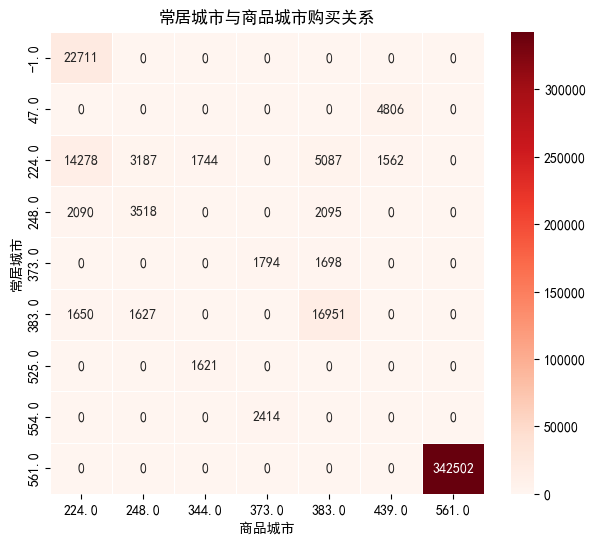

In [55]:
plt.figure(figsize=(7, 6))
sns.heatmap(filtered_pivot_table, cmap='Reds', linewidths=0.5, annot=True, fmt='g')
plt.title('常居城市与商品城市购买关系')
plt.xlabel('商品城市')
plt.ylabel('常居城市')
plt.show()

In [174]:
# 统计支付次数大于1的用户
repay_data = pay_times[pay_times['付款次数'] > 1]

In [175]:
# 计算复购率
repurchase_rate = len(repay_data) / len(pay_times)
print(f'复购率：{repurchase_rate:.2%}')

复购率：51.76%


In [177]:
# 统计每个用户的点击次数
clk_times = pay_data[['用户ID', '行为类型']].groupby('用户ID').agg('count').reset_index().rename(columns={'行为类型': '点击次数'})
# 统计点击次数为1的用户
clk_onetime = clk_times[clk_times['点击次数'] == 1]
# 计算跳失率
bounce_rate = round(clk_onetime.shape[0]/clk_times.shape[0], 2)
print(f'跳失率：{bounce_rate:.2%}')

跳失率：48.00%


In [179]:
# 总体各个阶段的流失率计算
pv_total = df4.shape[0]
Wastage_rate1 = round(1-clk_num/pv_total,4)
Wastage_rate2 = round(1-cart_num/clk_num,4)
Wastage_rate3 = round(1-pay_num/cart_num,4)
print('总浏览量-点击量的流失率：', Wastage_rate1)
print('点击量-加入购物车量流失率：',Wastage_rate2)
print('加入购物车量-购买量流失率：',Wastage_rate3)

总浏览量-点击量的流失率： 0.0941
点击量-加入购物车量流失率： 0.9591
加入购物车量-购买量流失率： 0.1917


In [200]:
# 按日分布
clk_date = clk_data[['用户ID', '日期']].groupby('日期')['用户ID'].agg('count')
cart_date = cart_data[['用户ID', '日期']].groupby('日期')['用户ID'].agg('count')
fav_date = fav_data[['用户ID', '日期']].groupby('日期')['用户ID'].agg('count')
pay_date = pay_data[['用户ID', '日期']].groupby('日期')['用户ID'].agg('count')

# 按时分布
clk_hour = clk_data[['用户ID', '小时']].groupby('小时')['用户ID'].agg('count')
cart_hour = cart_data[['用户ID', '小时']].groupby('小时')['用户ID'].agg('count')
fav_hour = fav_data[['用户ID', '小时']].groupby('小时')['用户ID'].agg('count')
pay_hour = pay_data[['用户ID', '小时']].groupby('小时')['用户ID'].agg('count')

# 按周分布
clk_weekday = clk_data[['用户ID', '星期']].groupby('星期')['用户ID'].agg('count')
cart_weekday = cart_data[['用户ID', '星期']].groupby('星期')['用户ID'].agg('count')
fav_weekday = fav_data[['用户ID', '星期']].groupby('星期')['用户ID'].agg('count')
pay_weekday = pay_data[['用户ID', '星期']].groupby('星期')['用户ID'].agg('count')


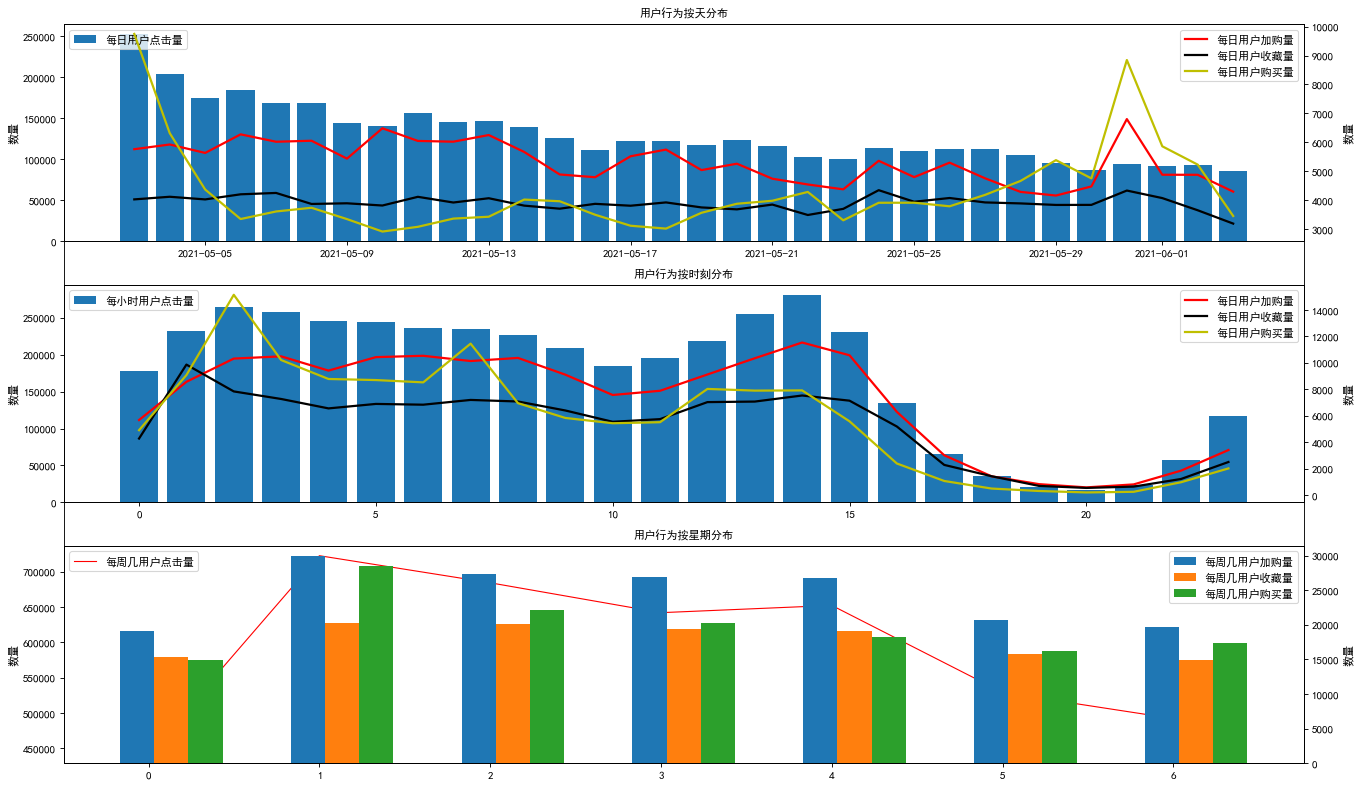

In [205]:
# 创建图形
fig = plt.figure(figsize=(20,12),dpi=80)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks([])  #去掉横坐标值
plt.yticks([])  #去掉纵坐标值

ax1 = fig.add_subplot(311)
date = clk_date.index.tolist()
ax1.bar(date, clk_date.values, label='每日用户点击量')
ax1.set_ylabel('数量')
ax1.set_title('用户行为按天分布', size=10)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() 
ax2.plot(date, cart_date.values, 'r', label='每日用户加购量', linewidth=2)
ax2.plot(date, fav_date.values, 'k', label='每日用户收藏量', linewidth=2)
ax2.plot(date, pay_date.values, 'y', label='每日用户购买量', linewidth=2)
ax2.set_ylabel('数量')
ax2.set_xlabel('日期')
ax2.legend(loc='upper right')

ax1 = fig.add_subplot(312)
hour = clk_hour.index.tolist()
ax1.bar(hour, clk_hour.values, label='每小时用户点击量')
ax1.set_ylabel('数量')
ax1.set_title('用户行为按时刻分布', size=10)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() 
ax2.plot(hour, cart_hour.values, 'r', label='每日用户加购量', linewidth=2)
ax2.plot(hour, fav_hour.values, 'k', label='每日用户收藏量', linewidth=2)
ax2.plot(hour, pay_hour.values, 'y', label='每日用户购买量', linewidth=2)
ax2.set_ylabel('数量')
ax2.set_xlabel('时刻')
ax2.legend(loc='upper right')

ax1 = fig.add_subplot(313)
weekday = clk_weekday.index.tolist()
length = len(clk_weekday)
x = np.arange(length) # 横坐标 
total_width, n = 0.6, 3 # 柱状总宽度，数据组数
width = total_width / n # 每个柱状的宽度
x1 = x - width / 3 # 第一组柱状横坐标起始位置
x2 = x1 + width # 第二组柱状横坐标起始位置
x3 = x2 + width  # 第三组柱状横坐标起始位置
ax1.plot(weekday, clk_weekday.values, 'r', linewidth=1, label='每周几用户点击量')
ax1.set_ylabel('数量')
ax1.set_title('用户行为按星期分布', size=10)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() 
ax2.bar(x1, cart_weekday.values, width=width, label='每周几用户加购量')
ax2.bar(x2, fav_weekday.values, width=width, label='每周几用户收藏量')
ax2.bar(x3, pay_weekday.values, width=width, label='每周几用户购买量')
ax2.set_xticks(x, weekday)
ax2.set_ylabel('数量')
ax2.set_xlabel('星期')
ax2.legend(loc='upper right')

plt.show()


In [207]:
# 按商品分组统计商品被点击、加购、收藏、购买的数量
item_clk_num = clk_data.groupby('商品ID')['行为类型'].count().reset_index().rename(columns={'行为类型':'点击数量'})
item_cart_num = cart_data.groupby('商品ID')['行为类型'].count().reset_index().rename(columns={'行为类型':'加购数量'})
item_fav_num = fav_data.groupby('商品ID')['行为类型'].count().reset_index().rename(columns={'行为类型':'收藏数量'})
item_pay_num = pay_data.groupby('商品ID')['行为类型'].count().reset_index().rename(columns={'行为类型':'购买数量'})

In [213]:
# 商品点击Top10
item_clk_num = item_clk_num.sort_values(by='点击数量', ascending=False)
item_clk_Top10 = item_clk_num.head(10)

# 商品收藏+加购Top10
favcart_data = pd.concat([fav_data, cart_data], axis=0)
item_favcart_num = favcart_data.groupby('商品ID')['行为类型'].count().reset_index().rename(columns={'行为类型':'收藏加购数量'})
item_favcart_num = item_favcart_num.sort_values(by='收藏加购数量', ascending=False)
item_favcart_Top10 = item_favcart_num.head(10)

# 商品购买Top10
item_pay_num = item_pay_num.sort_values(by='购买数量', ascending=False)
item_pay_Top10 = item_pay_num.head(10)


C:\Users\zwf\AppData\Local\Temp\ipykernel_40068\4009330983.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="商品ID", y="点击数量", data=item_clk_Top10, palette="Blues_r", order=item_clk_Top10["商品ID"], width=0.6)
C:\Users\zwf\AppData\Local\Temp\ipykernel_40068\4009330983.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="商品ID", y="收藏加购数量", data=item_favcart_Top10, palette="Greens_r", order=item_favcart_Top10["商品ID"], width=0.6)
C:\Users\zwf\AppData\Local\Temp\ipykernel_40068\4009330983.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

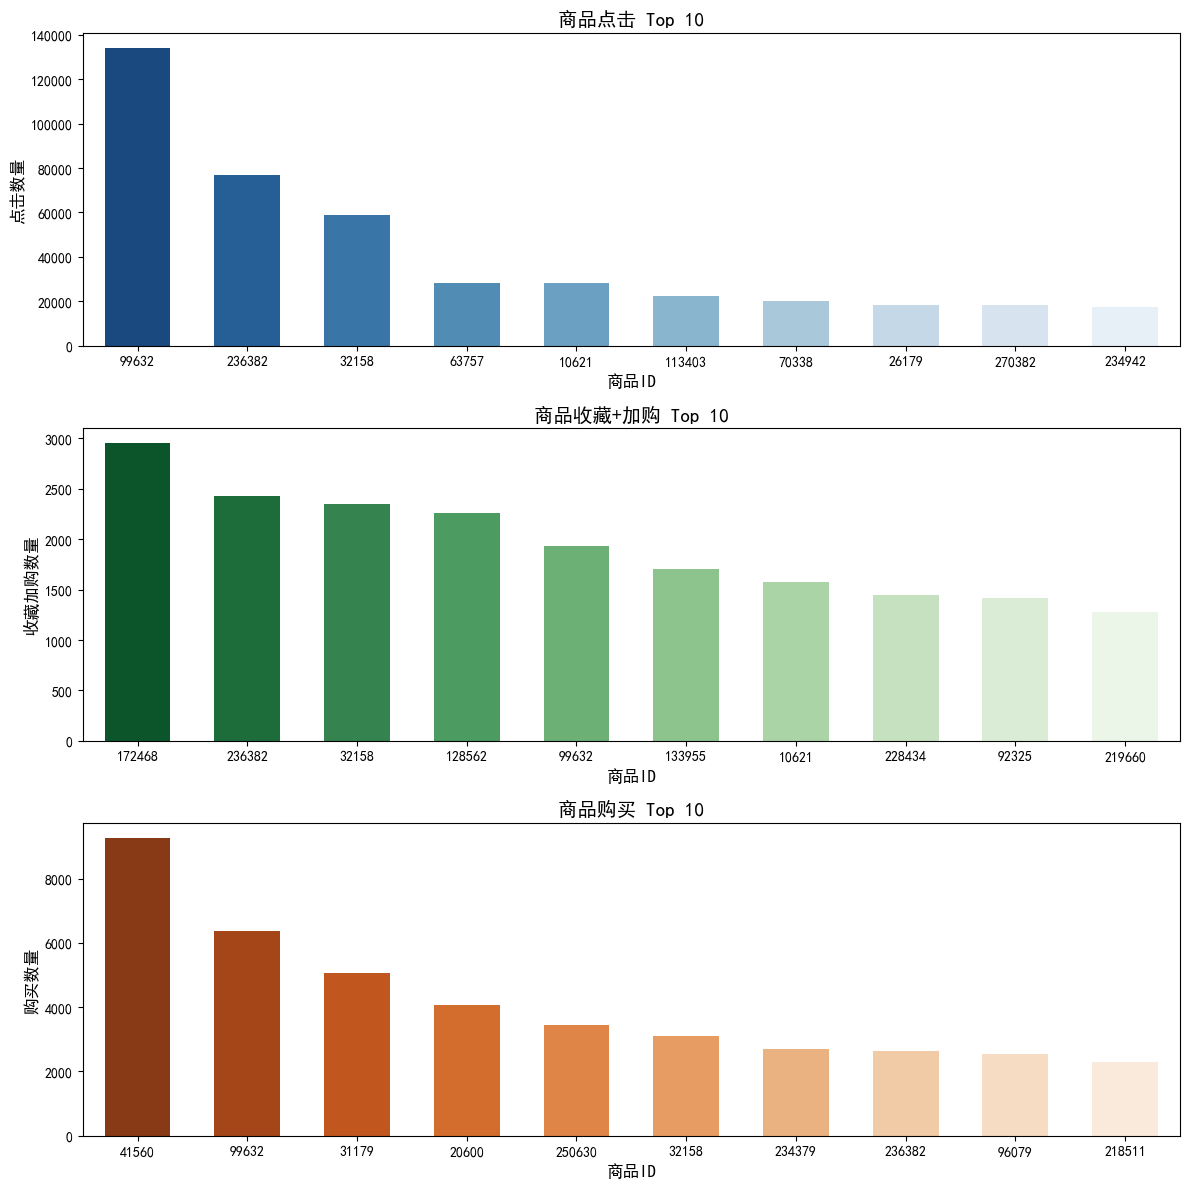

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# 对每个数据框按对应的数量列进行排序
item_clk_Top10 = item_clk_Top10.sort_values(by="点击数量", ascending=False)
item_favcart_Top10 = item_favcart_Top10.sort_values(by="收藏加购数量", ascending=False)
item_pay_Top10 = item_pay_Top10.sort_values(by="购买数量", ascending=False)

# 设置画布大小和子图布局
plt.figure(figsize=(12, 12))

# 商品点击 Top 10 子图
plt.subplot(3, 1, 1)  # 第 1 行
sns.barplot(x="商品ID", y="点击数量", data=item_clk_Top10, palette="Blues_r", order=item_clk_Top10["商品ID"], width=0.6)
plt.title("商品点击 Top 10", fontsize=14)
plt.xlabel("商品ID", fontsize=12)
plt.ylabel("点击数量", fontsize=12)

# 商品收藏+加购 Top 10 子图
plt.subplot(3, 1, 2)  # 第 2 行
sns.barplot(x="商品ID", y="收藏加购数量", data=item_favcart_Top10, palette="Greens_r", order=item_favcart_Top10["商品ID"], width=0.6)
plt.title("商品收藏+加购 Top 10", fontsize=14)
plt.xlabel("商品ID", fontsize=12)
plt.ylabel("收藏加购数量", fontsize=12)

# 商品购买 Top 10 子图
plt.subplot(3, 1, 3)  # 第 3 行
sns.barplot(x="商品ID", y="购买数量", data=item_pay_Top10, palette="Oranges_r", order=item_pay_Top10["商品ID"], width=0.6)
plt.title("商品购买 Top 10", fontsize=14)
plt.xlabel("商品ID", fontsize=12)
plt.ylabel("购买数量", fontsize=12)

# 调整子图布局
plt.tight_layout()
plt.show()
